In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
kaggle_visible_evaluation = pd. read_csv("kaggle_visible_evaluation_triplets.txt", sep="\t",names=['user_id','song_id','freq'])

In [3]:
kaggle_visible_evaluation.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [4]:
unique_tracks = pd. read_csv("unique_tracks.txt",sep='<SEP>',names= ['track_id','song_id','artist_name','title'])

In [5]:
unique_tracks.head()

,track_id,song_id,artist_name,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [6]:
song_df = pd.merge(kaggle_visible_evaluation,unique_tracks.drop_duplicates(['song_id']), on="song_id", how="left")


In [7]:
song_df.head()

,user_id,song_id,freq,track_id,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


**Let's delete the unnessery columns**

In [8]:
song_df.drop(['track_id'],axis=1, inplace=True)

# Final data is

In [9]:
song_df.head()

,user_id,song_id,freq,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [10]:
song_df.columns          # to know the column names in the data

Index(['user_id', 'song_id', 'freq', 'artist_name', 'title'], dtype='object')

In [11]:
song_df.shape            # to the shape of the data

(1450933, 5)

In [12]:
print('Total number of observations are:',song_df.shape[0])

Total number of observations are: 1450933


### Let's check is there any missing values ###

In [13]:
song_df.isnull().sum()

user_id        0
song_id        0
freq           0
artist_name    0
title          1
dtype: int64

- There is 1 missing value in the release column data. let's drop that row

In [14]:
song_df.dropna(inplace=True)

In [15]:
song_df.shape

(1450932, 5)

In [16]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450932 entries, 0 to 1450932
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450932 non-null  object
 1   song_id      1450932 non-null  object
 2   freq         1450932 non-null  int64 
 3   artist_name  1450932 non-null  object
 4   title        1450932 non-null  object
dtypes: int64(1), object(4)
memory usage: 66.4+ MB


- In the given data 4 are object type (**Categorical columns**) columns and 1 is int type(**Numaric type**)

### Let's look in to column by column 

## Univariate analysis

#### user 

In [17]:
print('Total number of users in the data are :',song_df.user_id.nunique())

Total number of users in the data are : 110000


In [18]:
song_df.user_id.value_counts().sort_values(ascending=True).head()
print('**************************************************')
song_df.user_id.value_counts().sort_values(ascending=False).head()

ea1f36c853c061a396f131f9270dbbd3c57391b0    5
c4706d3692c40510c46faeaa4c9343e5b4677724    5
21660894b8eb96e1689036b81f55d278feab1f98    5
1a15a3af1bd6d5c1c7bcae469fb2f854a1bb1ee5    5
f9f88d271b10f053d4bae7db936527404b831577    5
Name: user_id, dtype: int64

**************************************************


7d90be8dfdbde170f036ce8a4b915440137cb11c    53
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
Name: user_id, dtype: int64

In [19]:
user = pd.DataFrame(song_df.user_id.value_counts())

In [20]:
user[(user.user_id>20) & (user.user_id<31)]

,user_id
6de6d7c1ee984263c40712d5a2a3067ac3858805,30
ab8b048fccfb9f7fd0ee33f3b73eb506dfad6761,30
f81d3ea5625070847bf2d668a4bd6efbd8617e0f,30
39693085732fd53885356ebb08196261c849b5d3,30
5760e879b3acef7008101c138821ea43981fcab4,30
...,...
1dc23584b204566fa30d859f971750dd5fcf48a5,21
1a1c52ed3a5936bb564ce45a5423f8d3b002b206,21
362f5db53985922d5d4d4fa05b9ea6b9ab493aee,21
367e20177009a08748879851fe52de2977befe36,21


In [21]:
user_less_then_5 = list(user[user.user_id <6].index)
Between_6_to_10 = list(user[(user.user_id >5)&(user.user_id <11)].index)
Between_11_to_20 = list(user[(user.user_id >10)&(user.user_id<21)].index)
Between_21_to_30 = list(user[(user.user_id >20)&(user.user_id<31)].index)
Between_31_to_40 = list(user[(user.user_id >30)&(user.user_id<41)].index)
Between_41_to_50 = list(user[(user.user_id >40)&(user.user_id<51)].index)
user_more_then_5 = list(user[user.user_id >50].index)

In [22]:
user_data = {'less_then_5': len(user_less_then_5),\
            "Between_6_to_10":len(Between_6_to_10),\
            'Between_11_to_20':len(Between_11_to_20),\
            'Between_21_to_30':len(Between_21_to_30),\
            'Between_31_to_40':len(Between_31_to_40),\
            'Between_41_to_50':len(Between_41_to_50),\
            'user_more_then_5':len(user_more_then_5)}

In [23]:
user_data

{'less_then_5': 13097,
 'Between_6_to_10': 41221,
 'Between_11_to_20': 36179,
 'Between_21_to_30': 14392,
 'Between_31_to_40': 4525,
 'Between_41_to_50': 574,
 'user_more_then_5': 12}

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 7 artists>

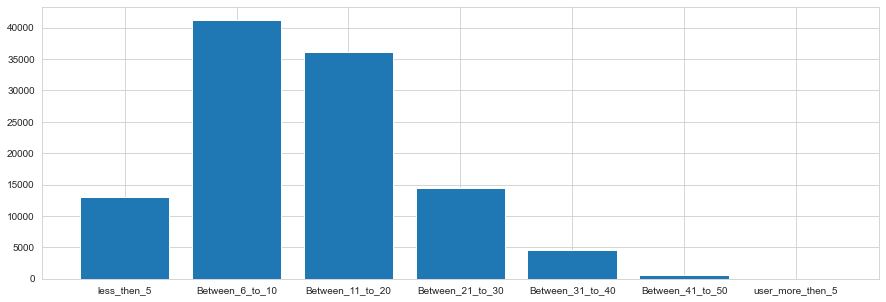

In [24]:
plt.figure(figsize=(15,5))
keys = user_data. keys()
values = user_data. values()
plt. bar(keys, values)


- As we are seeing the people who are listing songs in B/W 6 to 10 are more in the data

- From above one we can say that every user is listing minimum of **5** songs
- maximum number fo songs listed by single user in the given data is **53** songs

### song id

In [25]:
print('Total number of unique songs in the data are :',song_df.song_id.nunique())

Total number of unique songs in the data are : 163205


In [26]:
song_df.song_id.value_counts().sort_values(ascending=True).head()
print('**************************************************')
song_df.song_id.value_counts().sort_values(ascending=False).head()

SOKIPLZ12AB017CCD7    1
SOQLOOG12AB01865B0    1
SONHZNW12AC960DA80    1
SOHZYLV12AAF3B50CA    1
SOPRWIY12A8C13232D    1
Name: song_id, dtype: int64

**************************************************


SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
Name: song_id, dtype: int64

- **song id SOFRQTD12A81C233C0 is the highest number of listed song in the data.**
- **There are some songs that are just listned once by user**

In [27]:
(song_df.song_id.value_counts()==1).sum()

64746

In [28]:
song_info = pd.DataFrame(song_df.song_id.value_counts())

In [29]:
song_info.head()

,song_id
SOFRQTD12A81C233C0,5043
SOAUWYT12A81C206F1,4483
SOBONKR12A58A7A7E0,4136
SOAXGDH12A8C13F8A1,3780
SOSXLTC12AF72A7F54,3672


In [30]:
song_info[song_info.song_id==1]

,song_id
SOSOCJM12A67AD746A,1
SONFFEB12A58A7C434,1
SOLCOCH12A81C2301A,1
SOJFPHW12A6D4FA528,1
SOHPXGR12A58A7B2E4,1
...,...
SODMZFV12AB018FEDA,1
SORGSNK12A58A7EAF9,1
SOGJOVW12AAFF43432,1
SOWOBPF12AB018891B,1


In [31]:
(song_info[song_info.song_id==1].shape[0]/song_info.shape[0])*100

39.67157868937839

- **In the given data there are 64746 songs that are just once by the user in the entire data. This value is nearly 40% in the total songs.**

In [32]:
song_info[song_info.song_id>1000].index

Index(['SOFRQTD12A81C233C0', 'SOAUWYT12A81C206F1', 'SOBONKR12A58A7A7E0',
       'SOAXGDH12A8C13F8A1', 'SOSXLTC12AF72A7F54', 'SONYKOW12AB01849C9',
       'SOEGIYH12A6D4FC0E3', 'SODJWHY12A8C142CCE', 'SOLFXKT12AB017E3E0',
       'SOFLJQZ12A6D4FADA6', 'SOUSMXX12AB0185C24', 'SOUVTSM12AC468F6A7',
       'SOHTKMO12AB01843B0', 'SOTWNDJ12A8C143984', 'SOWCKVR12A8C142411',
       'SOBOUPA12A6D4F81F1', 'SOOFYTN12A6D4F9B35', 'SOPUCYA12A8C13A694',
       'SOVDSJC12A58A7A271', 'SOPPROJ12AB0184E18', 'SOKLRPJ12A8C13C3FE',
       'SOPTLQL12AB018D56F', 'SOUFTBI12AB0183F65', 'SODGVGW12AC9075A8D',
       'SOBOAFP12A8C131F36', 'SOSCIZP12AB0181D2F', 'SOCVTLJ12A6310F0FD',
       'SOLRGVL12A8C143BC3', 'SOFKABN12A8AE476C6', 'SOXFPND12AB017C9D1',
       'SOKUPAO12AB018D576', 'SOCKSGZ12A58A7CA4B', 'SOPXKYD12A6D4FA876',
       'SOUNZHU12A8AE47481', 'SOTWSXL12A8C143349', 'SOTCMDJ12A6D4F8528',
       'SOPQLBY12A6310E992', 'SOSZJFV12AB01878CB', 'SOULTKQ12AB018A183',
       'SOGPBAW12A6D4F9F22', 'SOUFPNI12A8C142D19', 

In [33]:
song_listned_morethen_1000 = list(song_info[song_info.song_id>999].index)
song_between_500_to_1000 = list(song_info[(song_info.song_id<1000)&(song_info.song_id>500)].index)
song_between_500_to_100= list(song_info[(song_info.song_id<501)&(song_info.song_id>101)].index)
song_between_100_to_50 = list(song_info[(song_info.song_id<101)&(song_info.song_id>50)].index)
song_between_50_to_10 = list(song_info[(song_info.song_id<51)&(song_info.song_id>10)].index)
song_between_10_to_5 = list(song_info[(song_info.song_id<11)&(song_info.song_id>5)].index)
song_less_then_5 = list(song_info[song_info.song_id<6].index)

In [34]:
song_data = {'song_listned_morethen_1000': len(song_listned_morethen_1000),\
            "song_between_500_to_1000":len(song_between_500_to_1000),\
            'song_between_500_to_100':len(song_between_500_to_100),\
            'song_between_100_to_50':len(song_between_100_to_50),\
            'song_between_50_to_10':len(song_between_50_to_10),\
            'song_between_10_to_5':len(song_between_10_to_5),\
            'song_less_then_5':len(song_less_then_5)}

In [35]:
song_data

{'song_listned_morethen_1000': 51,
 'song_between_500_to_1000': 108,
 'song_between_500_to_100': 1567,
 'song_between_100_to_50': 2919,
 'song_between_50_to_10': 19964,
 'song_between_10_to_5': 16993,
 'song_less_then_5': 121571}

<Figure size 1440x360 with 0 Axes>

<BarContainer object of 7 artists>

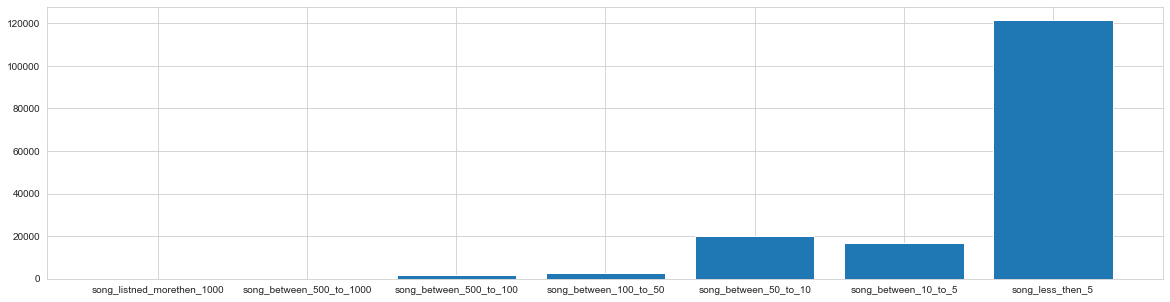

In [36]:
plt.figure(figsize=(20,5))
keys = song_data. keys()
values = song_data. values()
plt. bar(keys, values)


### Freq  

- Number of times user listned single song

In [37]:
song_df.freq.describe()                  # To get the basic staistics

count    1.450932e+06
mean     3.187151e+00
std      7.051666e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      9.230000e+02
Name: freq, dtype: float64

In [38]:
song_df[song_df.freq ==923]

,user_id,song_id,freq,artist_name,title
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)


- maximum number of times a song is listned by user is 923
  - user id is **22bb29714137fa47083963c30e1a26f1bf517e7d**
  - song id is **SOXTUWG12AB018A2E2**

<AxesSubplot:xlabel='freq', ylabel='Density'>

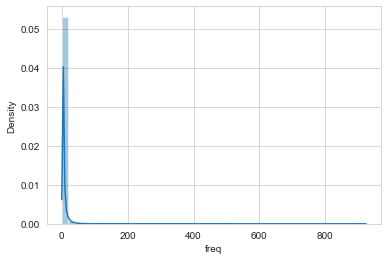

In [39]:
sns.distplot(song_df.freq,)

<Figure size 3600x288 with 0 Axes>

<AxesSubplot:>

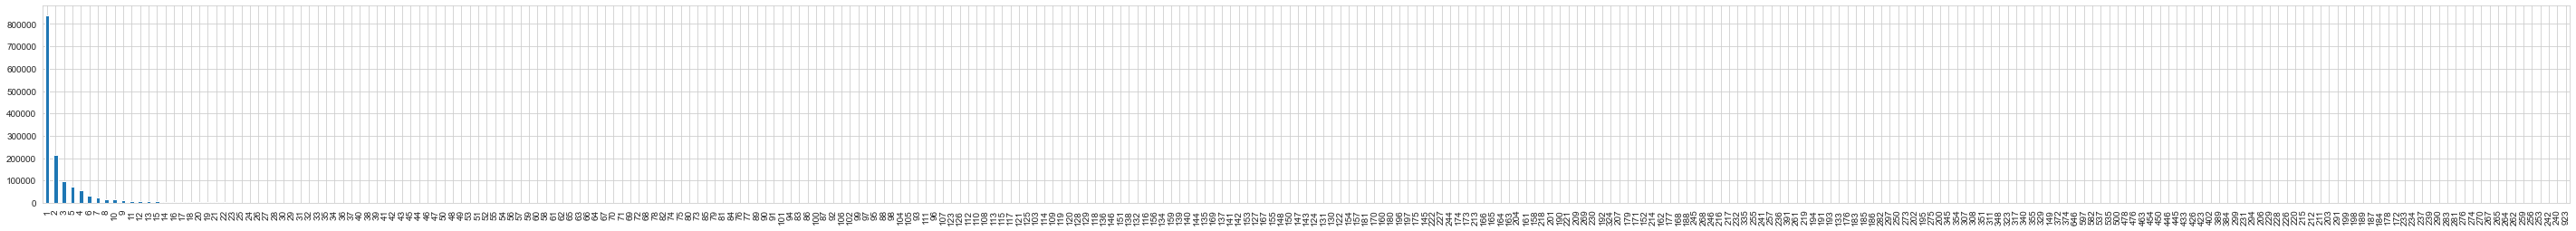

In [40]:
plt.figure(figsize=(50,4))

song_df.freq.value_counts().plot(kind='bar')

<AxesSubplot:>

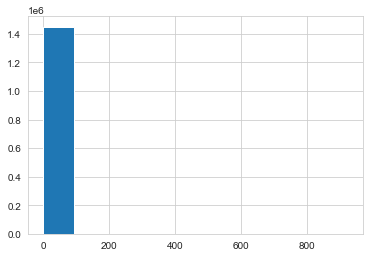

In [41]:
song_df.freq.hist()

- From the two plots we can see that the most of the songs listned in B/W 1-50

**Let's look in to the outliers**

In [42]:
def Upper_lower(col):
    Q1= np.percentile(col,25)
    Q3= np.percentile(col,75)
    IQR = Q3-Q1
    Upper = Q3+1.5*IQR
    Lower = Q1-1.5*IQR
    return(Upper,Lower)
    

In [43]:
Upper,Lower = Upper_lower(song_df.freq)
Upper,Lower

(6.0, -2.0)

In [44]:
song_df[(song_df.freq<Lower)|(song_df.freq>Upper)]

,user_id,song_id,freq,artist_name,title
28,9be82340a8b5ef32357fe5af957ccd54736ece95,SOHGGAH12A58A795BE,15,Slum Village,Climax
55,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,SODBXDO12A6D4FCD4F,14,Dario Marianelli,Love Letters
62,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,SOUDGEV12A8C135FC9,10,Counting Crows / Vanessa Carlton,Big Yellow Taxi
86,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,SORIWEH12A8C13D4A6,54,Was (Not Was),The Sky's Ablaze
119,e9dc6b4c2b22aa6dc8260e1963021567728055b2,SOYOMRA12A6D4F9975,11,Phil Collins,You Can't Hurry Love
...,...,...,...,...,...
1450855,07f2f354a2a4390624e0d04e4a555ef67e98f673,SOECSYA12A8C134C34,41,Catupecu Machu,Origen Extremo
1450856,07f2f354a2a4390624e0d04e4a555ef67e98f673,SODPPBT12A8C141D90,9,Kings Of Leon,Closer
1450859,07f2f354a2a4390624e0d04e4a555ef67e98f673,SOGMNZG12AB0182DAD,24,Veto,You Are A Knife
1450870,07f2f354a2a4390624e0d04e4a555ef67e98f673,SONGIXY12A58A7BB42,10,LCD Soundsystem,Someone Great


In [45]:
(song_df[(song_df.freq<Lower)|(song_df.freq>Upper)].shape[0]/song_df.shape[0])*100

9.770065034060865

<AxesSubplot:xlabel='freq'>

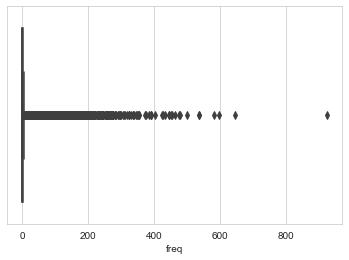

In [46]:
sns.boxplot(song_df.freq)

### Artist_name

In [47]:
artist  = pd.DataFrame(song_df.artist_name.value_counts())
artist

,artist_name
Coldplay,12279
Kings Of Leon,8514
Florence + The Machine,8213
Justin Bieber,7669
Jack Johnson,6784
...,...
Jah Warrior Feat. Winston Mcanuff,1
The Esquires,1
Frl.Menke,1
Louise Goffin,1


- **There are  28360 artists in the given data**

In [48]:
# The top 10 populer artists in the given data are 

artist.index[:10]

Index(['Coldplay', 'Kings Of Leon', 'Florence + The Machine', 'Justin Bieber',
       'Jack Johnson', 'Train', 'The Black Keys', 'Eminem', 'OneRepublic',
       'Muse'],
      dtype='object')

<AxesSubplot:>

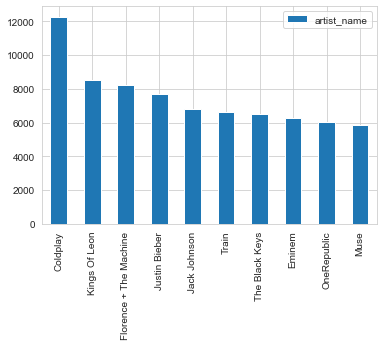

In [49]:
artist[:10].plot(kind='bar')

In [50]:
artist[artist.artist_name ==1]

,artist_name
Jossie Esteban & La Patrulla 15,1
The New Birth Brass Band,1
MISERY INDEX,1
Brooke Valentine feat. Queenz Deliz,1
Swayzak;Kirsty Hawkshaw,1
...,...
Jah Warrior Feat. Winston Mcanuff,1
The Esquires,1
Frl.Menke,1
Louise Goffin,1


In [51]:
artist[artist.artist_name <3].shape[0]/artist.shape[0]

0.29862482369534554

- There are few artists who are just occoured once or twise in the given data (**nearly 30%**)

- As we no the title and song id is representing the same 

In [52]:
artist_more_then_1000 = list(artist[artist.artist_name>999].index)
artist_between_500_to_1000 = list(artist[(artist.artist_name<1000)&(artist.artist_name>500)].index)
artist_between_500_to_100= list(artist[(artist.artist_name<501)&(artist.artist_name>101)].index)
artist_between_100_to_50 = list(artist[(artist.artist_name<101)&(artist.artist_name>50)].index)
artist_between_50_to_10 = list(artist[(artist.artist_name<51)&(song_info.song_id>10)].index)
artist_between_10_to_5 = list(artist[(artist.artist_name<11)&(artist.artist_name>5)].index)
artist_less_then_5 = list(artist[(artist.artist_name<6)].index)

In [53]:
len(artist_between_100_to_50)

1806

In [54]:
artist_data = {'artist_more_then_1000': len(artist_more_then_1000),\
            "artist_between_500_to_1000":len(artist_between_500_to_1000),\
            'artist_between_500_to_100':len(artist_between_500_to_100),\
            'artist_between_100_to_50':len(artist_between_100_to_50),\
            'artist_between_50_to_10':len(artist_between_50_to_10),\
            'artist_between_10_to_5':len(artist_between_10_to_5),\
            'artist_less_then_5':len(artist_less_then_5)}

In [55]:
artist_data

{'artist_more_then_1000': 214,
 'artist_between_500_to_1000': 309,
 'artist_between_500_to_100': 1958,
 'artist_between_100_to_50': 1806,
 'artist_between_50_to_10': 0,
 'artist_between_10_to_5': 3749,
 'artist_less_then_5': 13321}

<Figure size 1440x360 with 0 Axes>

<BarContainer object of 7 artists>

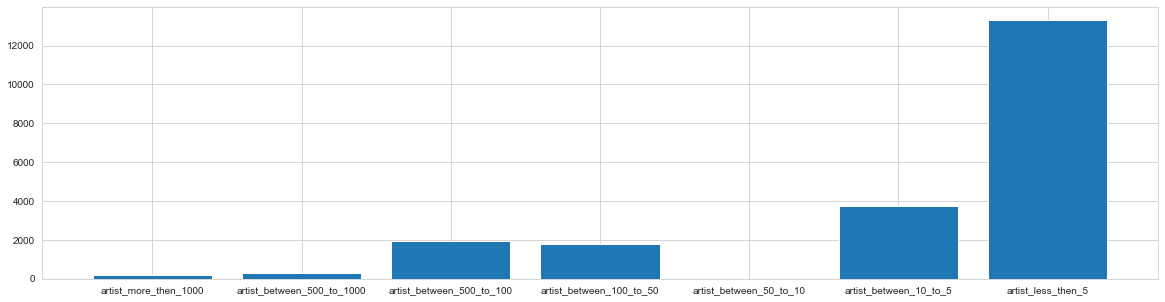

In [56]:
plt.figure(figsize=(20,5))
keys = artist_data. keys()
values = artist_data. values()
plt. bar(keys, values)


In [57]:
song_df.keys()

Index(['user_id', 'song_id', 'freq', 'artist_name', 'title'], dtype='object')

## Most popular songs
How do we determine which are the most popular songs? For this task, we'll count how many times each song appears. Note that while we are using freq, we only care about the number of rows, we don't consider the number present in that row. This number represents how many times one user listen to the same song.

In [58]:
#count how many rows we have by song, we show only the ten more popular songs 
top_songs = song_df.groupby('title')['freq'].count().reset_index().sort_values(['freq', 'title'], ascending = [0,1])
top_songs['percentage']  = round(top_songs['freq'].div(top_songs['freq'].sum())*100, 2)

In [59]:
top_songs = top_songs[:10]
top_songs

,title,freq,percentage
98812,Sehr kosmisch,5043,0.35
125393,Undo,4483,0.31
136066,You're The One,4270,0.29
28716,Dog Days Are Over (Radio Edit),3780,0.26
93984,Revelry,3672,0.25
98585,Secrets,3456,0.24
49061,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,0.23
47683,Hey_ Soul Sister,2791,0.19
37656,Fireflies,2745,0.19
121358,Tive Sim,2669,0.18


In [60]:
labels = top_songs['title'].tolist()
counts = top_songs['freq'].tolist()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

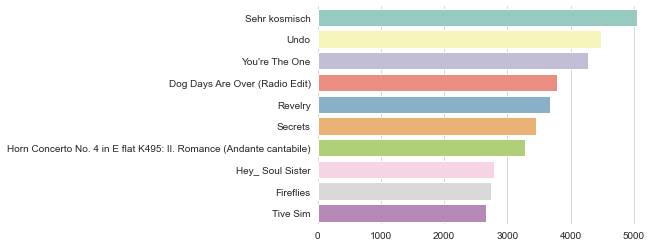

In [61]:
#Analysis of title and freq columns
#Most popular song title using freq column
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

## Most popular artist
For the this task, we'll count how many times each artist appears. Again, we'll count how many times the same artist appears.

In [62]:
#count how many rows we have by artist name, we show only the ten more popular artist 
top_artists  = song_df.groupby(['artist_name'])['freq'].count().reset_index().sort_values(['freq', 'artist_name'], 
                                                                                                ascending = [0,1])

In [63]:
top_artists = top_artists[:10]
top_artists

,artist_name,freq
5085,Coldplay,12279
13610,Kings Of Leon,8514
8801,Florence + The Machine,8213
12964,Justin Bieber,7669
11378,Jack Johnson,6784
26440,Train,6617
23945,The Black Keys,6507
7969,Eminem,6297
18346,OneRepublic,6027
17317,Muse,5849


<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

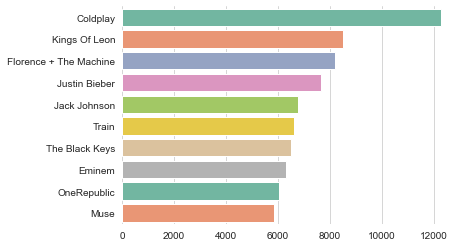

In [64]:
#Analysis of artist_name and freq columns
#Most popular artist_name using freq column
plt.figure()
labels = top_artists['artist_name'].tolist()
counts = top_artists['freq'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

## Frequency count by user

We can also get some other information from the feature freq (frequency of number of times song is played). We will answer the folloqing questions:

### What was the maximum time the same user listen to a same song?

In [65]:
freq_counts = pd.DataFrame(song_df.groupby('freq').size(), columns=['count'])
print(f"The maximum time the same user listened to the same songs was: {freq_counts.reset_index(drop=False)['freq'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 923


### How many times on average the same user listen to a same song?

In [66]:
print(f"On average, a user listen to the same song {song_df['freq'].mean()} times")

On average, a user listen to the same song 3.187150741730143 times


<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='freq'>

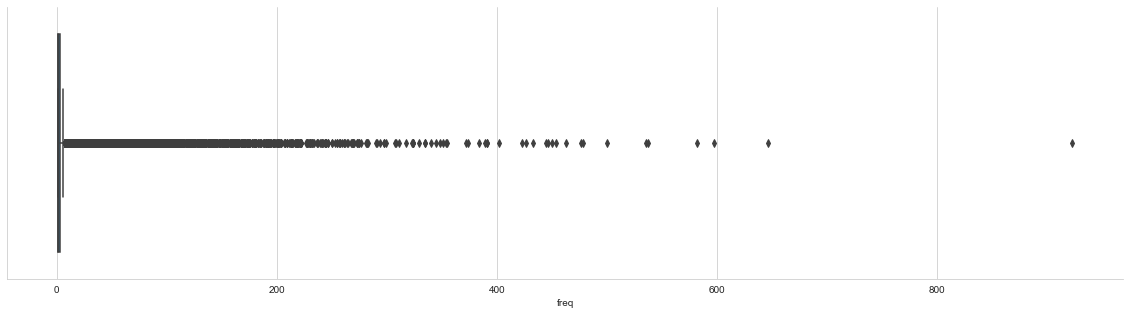

In [67]:
#check distribution of freq column from the dataset
#boxplot
plt.figure(figsize=(20, 5))
sns.boxplot(x='freq', data=song_df)
sns.despine()

### What are the most frequent number of times a user listen to the same song?

In [68]:
freq_counts_temp = freq_counts[freq_counts['count'] > 50].reset_index(drop=False)

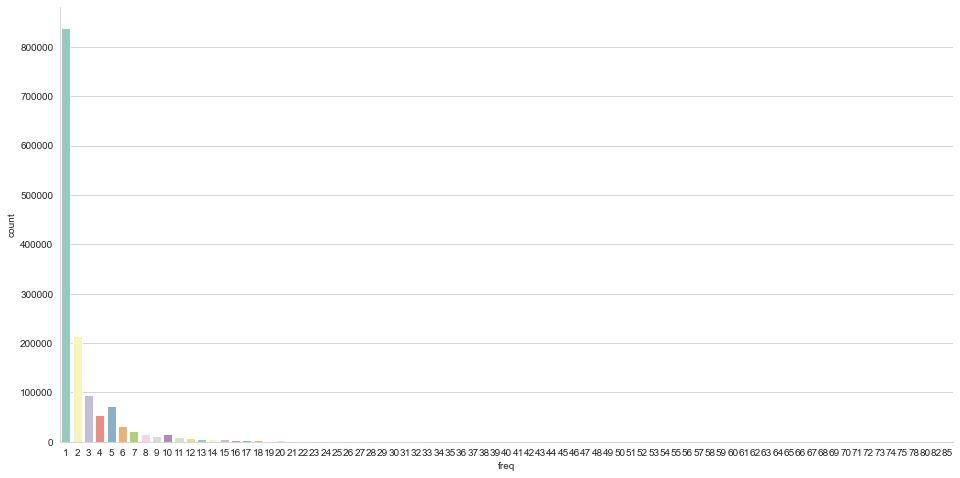

In [69]:
plt.figure(figsize=(16, 8))
sns.barplot(x='freq', y='count', palette='Set3', data=freq_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

### How many songs does a user listen in average?

In [70]:
song_user = song_df.groupby('user_id')['song_id'].count()

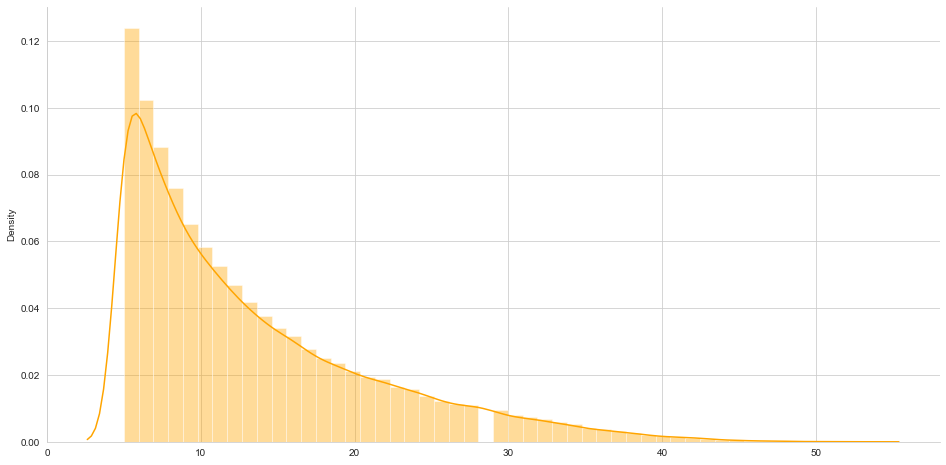

In [71]:
#analysis between user_id and song_id
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

### Prepare the data

In [72]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].index.to_list()

In [73]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_id_more_ten = song_df[song_df['user_id'].isin(song_ten_id)].reset_index(drop=True)
df_song_id_more_ten.head()

,user_id,song_id,freq,artist_name,title
0,0b254c684efb08fd04933add2d1e4191d2a87bac,SOOPUTL12A8C143381,1,Enur,Whine feat. Beenie Man & Natalie Storm
1,0b254c684efb08fd04933add2d1e4191d2a87bac,SOPOANU12A8AE48C9B,2,Nickelback,Too Bad
2,0b254c684efb08fd04933add2d1e4191d2a87bac,SOUDEUC12A6D4F95A7,1,Beirut,Bratislava
3,0b254c684efb08fd04933add2d1e4191d2a87bac,SOEBOWM12AB017F279,1,Eagles,Hotel California
4,0b254c684efb08fd04933add2d1e4191d2a87bac,SOEANYI12A8C1426C6,1,Mitsoura,Kaman Song


In [74]:
from sklearn.model_selection import train_test_split
import time
#from sklearn.externals import joblib
import itemsimilarity as Recommenders

In [75]:
#create a merge column song for title and artist_name here

In [76]:
song_grouped = song_df.groupby(['song_id']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'song_id'], ascending = [0,1])

,song_id,freq,percentage
38185,SOFRQTD12A81C233C0,5043,0.347570
5478,SOAUWYT12A81C206F1,4483,0.308974
10546,SOBONKR12A58A7A7E0,4136,0.285058
6096,SOAXGDH12A8C13F8A1,3780,0.260522
121599,SOSXLTC12AF72A7F54,3672,0.253079
...,...,...,...
163190,SOZZYCA12AB0182579,1,0.000069
163198,SOZZZFM12AC4687A9E,1,0.000069
163199,SOZZZFW12AB0187AD1,1,0.000069
163201,SOZZZKJ12A6D4FBF66,1,0.000069


In [77]:
users = song_df['user_id'].unique()

In [78]:
len(users)

110000

In [79]:
songs = song_df['song_id'].unique()
len(songs)

163205

### Item-Item similarity model building

In [80]:
# item-item similarity model building
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))

                                          user_id             song_id  freq  \
1411436  99904119f19ee92f4446438d00b8babe992093f2  SOBYDXK12AB0182382     3   
624059   09599f64b077a87803d842f41895b54f6bb5953e  SOKGOUQ12AF72A9B39     1   
81031    99e559bf8447464979d6af4b5e32380185b722ad  SOGRJCX12A67ADC8EB     1   
497938   95c919ac546a6ee185a0e41671472a211fd8558e  SOSLZXV12A8C1354C9     1   
1077502  b4e4254d7f38c333e542a85a1b111b01f0964e15  SOOXDSN12A8C144DC8     5   

                 artist_name                     title  
1411436  Stone Temple Pilots   Lounge Fly (LP Version)  
624059                Enigma                 Mea Culpa  
81031              Van Halen  Eruption (Album Version)  
497938          Eric Clapton           Tears In Heaven  
1077502          Ace of Base                    Donnie  


In [81]:
#item similarity recommendation model being used here
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'title')

In [ ]:

#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62:
------------------------------------------------------------------------------------
Passacaglia
Pastorale
In The Waiting Line
Until The Morning
Love Letters
Big Yellow Taxi
Un Simple Histoire
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 7
no. of unique songs in the training set: 126408


In [ ]:
user_id = users[7]

user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

In [ ]:
is_model.get_similar_items(['Too Bad'])

In [ ]:
title = 'Too Bad'
is_model.get_similar_items([title])